### About this dataset:



Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide. Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

### Task:
    
Create a model to assess the likelihood of a death by heart failure event.

### Steps Involved:
1. [Reading and understanding the data](#1)
2. [Exploratory Data Analysis (EDA)](#2)
3. [Performing Train-Test Split](#3)
4. [Handling data imbalance using SMOTE](#4)
5. [Feature Engineering](#5)
    - [Feature Selection](#5.1)
    - [Feature Scaling](#5.2)
6. [Model Building/Evaluation](#6)
7. [Conclusion](#7)

<a id="1"></a>
# 1. Reading and understanding the data

In [1]:
# importing prerequisites
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [2]:
# Importing dataset
df = pd.read_csv('../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
# Checking numerical attributes stats, to identify if these is any abnormality
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
df.shape

(299, 13)

In [7]:
# Checking if there are any missing values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Since everything seems normal in the dataset, we can skip Data Formatting step and move directly to EDA.

<a id="2"></a>
# 2. Exploratory Data Analysis (EDA)

## a) Univariate Analysis

**Categorical Columns**

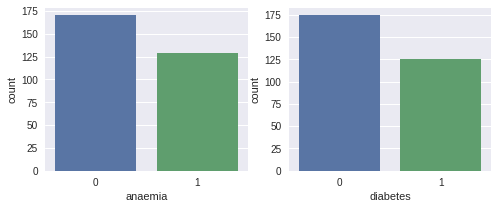

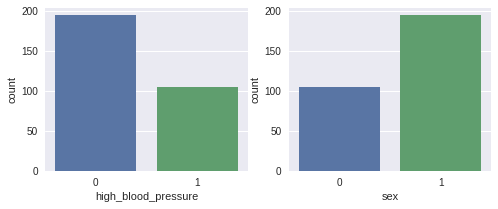

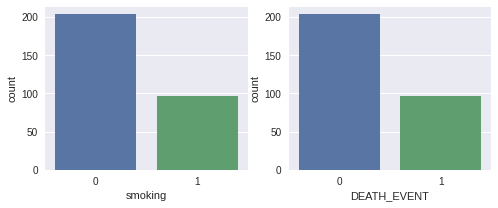

In [8]:
# Visualizing categorical features
cat_features = ["anaemia","diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]

i=0
while i < 6:
    fig = plt.figure(figsize=[8,3]) 

    plt.subplot(1,2,1)
    sns.countplot(x=cat_features[i], data=df)
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_features[i], data=df)
    i += 1
    
    plt.show()

**Numerical Columns**

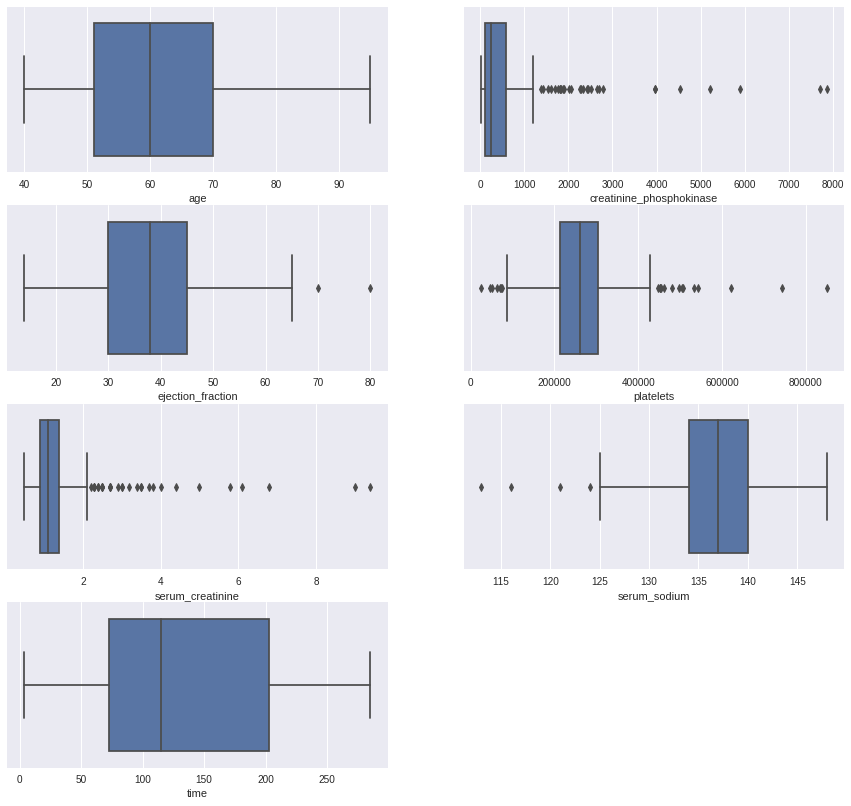

In [9]:
# Visualizing numerical columns

# Extracting numerical columns using categorical columns
num_features = df.columns[~df.columns.isin(cat_features)].tolist()
r = c = 0
fig,ax = plt.subplots(4,2,figsize=(15,14))

for n,i in enumerate(num_features):
    sns.boxplot(x=i, data=df,ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

As can be observed from above boxplots 'creatinine_phosphokinase', 'platelets' & 'serum_creatinine' are having outliers which might affect the decision making of our model. There are various techniques using which one can treat outliers like capping the values or by removing the entire row. But for taking such decisions, one must have domain knowledge. So for now we will be keeping the them as it is.  

## b) Bivariate Analysis

**Categorical features vs target variable**

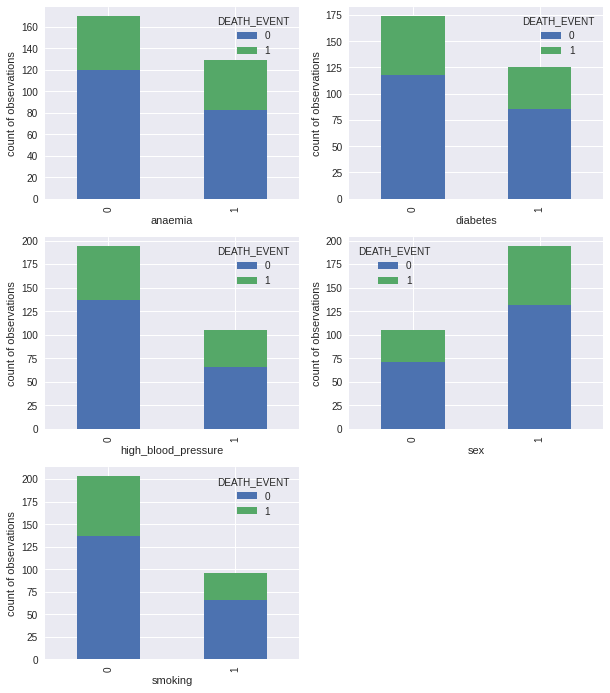

In [10]:
cat_features = ["anaemia","diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]
r = c = 0
fig,ax = plt.subplots(3,2,figsize=(10,12))

for n,i in enumerate(cat_features[:-1]):
    temp = df.pivot_table(columns=df.DEATH_EVENT,index=df[i],aggfunc='count')['age']
    temp.plot.bar(stacked=True,ax=ax[r,c])
    ax[r,c].set_ylabel("count of observations")
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

- It seems that "male" patients have higher tendency get heart problems.
- Above distribution suggests that smoking is not the root cause behind Cardiovascular diseases(CVDs).
- There are fewer cases of CVDs patients that have high blood pressure. 

**Numerical features vs target variable**

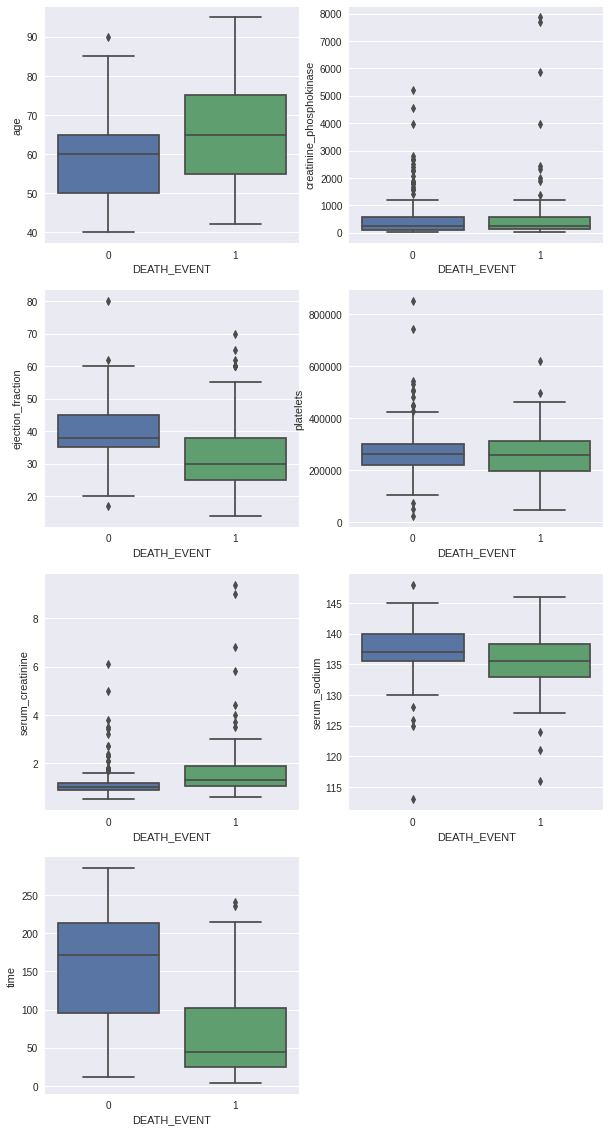

In [11]:
# Extracting numerical columns using categorical columns
num_features = df.columns[~df.columns.isin(cat_features)].tolist()
r = c = 0
fig,ax = plt.subplots(4,2,figsize=(10,20))

for n,i in enumerate(num_features):
    sns.boxplot(x='DEATH_EVENT',y=i, data=df,ax=ax[r,c])
    c+=1
    if (n+1)%2==0:
        r+=1
        c=0
ax[r,c].axis("off")
plt.show()

- Generally patients who die due to CVDs are older then the patients who survive.
- Concentation of 'serum_sodium' and 'ejection_fraction' are higher for patients who survive CVDs.
- 'serum_creatinine' is lower for patients who survive CVDs.

<a id="3"></a>
# 3. Performing Train-Test split

In [12]:
from sklearn.model_selection import train_test_split

y = df['DEATH_EVENT'] 
X = df.drop('DEATH_EVENT',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(f'X_train order : {X_train.shape}')
print(f'y_train order : {y_train.shape}')
print(f'X_test order : {X_test.shape}')
print(f'y_test order :{y_test.shape}')

X_train order : (239, 12)
y_train order : (239,)
X_test order : (60, 12)
y_test order :(60,)


<a id="4"></a>
# 4. Handling data imbalance using SMOTE

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance (eg. ratio of 90:10). These kind of senarios are usually common in Healthcare and BSFI domain. eg: In Credit risk analysis, where the credit worthiness of a potential borrowers is determined, chances of approving a bad loan are very low thus making the target variable very skewed.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short. <a href="https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/">READ MORE...</a>

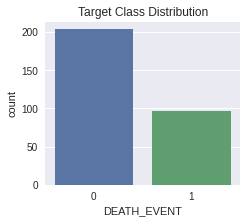

In [13]:
# Target distribution
plt.figure(figsize=(3.5,3))
sns.countplot(df['DEATH_EVENT'])
plt.title("Target Class Distribution")
plt.show()

Above plot shows that our dataset is moderately imbalanced. So, performing SMOTE analysis will not make any sense. Moreover since our dataset has very few training samples, performing SMOTE will reduce our model accuracy drastically.

But for the sake of understanding lets see what are the steps involved in SMOTE analysis.

**Creating Synthetic samples using SMOTE Analysis**

In [14]:
from imblearn.over_sampling import SMOTE

smote_up = SMOTE(random_state = 42)
X_train_res , y_train_res = smote_up.fit_sample(X_train,y_train)

In [15]:
from collections import Counter
# Target distribution post SMOTE Analysis
print("Class distribution without SMOTE:",Counter(y_train))
print("Class distribution with SMOTE:",Counter(y_train_res))

Class distribution without SMOTE: Counter({0: 157, 1: 82})
Class distribution with SMOTE: Counter({0: 157, 1: 157})


We can see that count of samples in class '1' have increased from '82' to '157' making the ratio of target classes 1:1.

<a id="5"></a>
# 5. Feature Engineering

<a id="5.1"></a>
## a) Feature Selection

We will be using RFE which is a wrapper based method for selecting best features.

In [16]:
from sklearn.feature_selection import RFE
def top_feat(model,feat_cnt):
    '''
    This function provides the top "n" features for provided model using RFE.
    '''
    rfe = RFE(model, n_features_to_select=feat_cnt)
    rfe.fit(X_train, y_train)
    return X.columns[rfe.support_].to_list()

***There are other types of feature selection techniques which are mentioned below.***

#### i) Filter Based Methods

Features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable. Filter methods are much faster compared to wrapper methods as they do not involve training the models. We need to take care of multicollinearity beforehand. Eg:
- Pearson Correlation
- Chi-Square test
- ANOVA
- LDA

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2016/11/FS1.png"></img>

In [17]:
# Saving 'DEATH_EVENT' corr. to a DataFrame
Feature_Imp = df.corr()['DEATH_EVENT'].reset_index()
Feature_Imp.drop(12,inplace=True)

In [18]:
# Converting Pearsons corr. to its absolute value
Feature_Imp.rename(columns={'DEATH_EVENT':'Peason_Corr'},inplace = True)
Feature_Imp['Peason_Corr'] = Feature_Imp['Peason_Corr'].abs()

In [19]:
Feature_Imp.sort_values(by='Peason_Corr',ascending=False,ignore_index=True,inplace = True)
Feature_Imp

,index,Peason_Corr
0,time,0.526964
1,serum_creatinine,0.294278
2,ejection_fraction,0.268603
3,age,0.253729
4,serum_sodium,0.195204
5,high_blood_pressure,0.079351
6,anaemia,0.066270
7,creatinine_phosphokinase,0.062728
8,platelets,0.049139
9,smoking,0.012623


#### ii) Wrapper Based Method

Use a subset of features and train a model using them. Based on the inferences that we draw from the previous model, we decide to add or remove features from your subset. These methods are usually computationally very expensive. One example of this is RFE i.e. Recursive Feature Elimination which uses"coef_" or "feature_importances_" to select best features.

- Recusive Feature Elimination (RFE)
- Backward Elimination
- Forward Selection

In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [21]:
# Selecting top 6 features using RFE for Logestic Regression Model
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=6, verbose=1)
rfe.fit(X_train, y_train)
rfe_df = pd.DataFrame(list(zip(X.columns, rfe.support_, rfe.ranking_)),columns= ['index','RFE_Support','RFE_rank'])
rfe_df

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.


,index,RFE_Support,RFE_rank
0,age,False,2
1,anaemia,True,1
2,creatinine_phosphokinase,False,6
3,diabetes,True,1
4,ejection_fraction,True,1
5,high_blood_pressure,True,1
6,platelets,False,7
7,serum_creatinine,True,1
8,serum_sodium,False,5
9,sex,True,1


In [22]:
# Columns to be excluded for building Logestic Regression Model
X.columns[~rfe.support_].to_list()

['age',
 'creatinine_phosphokinase',
 'platelets',
 'serum_sodium',
 'smoking',
 'time']

In [23]:
# Columns to be included for building Logestic Regression Model
X.columns[rfe.support_].to_list()

['anaemia',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'serum_creatinine',
 'sex']

#### iii) Embedded Methods

Embedded methods combine the qualities of filter and wrapper methods. It’s implemented by algorithms that have their own built-in feature selection methods. 
eg:
- Lasso regression performs L1 regularization
- Ridge regression performs L2 regularization
- feature_importances_ in Decision tree based models

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

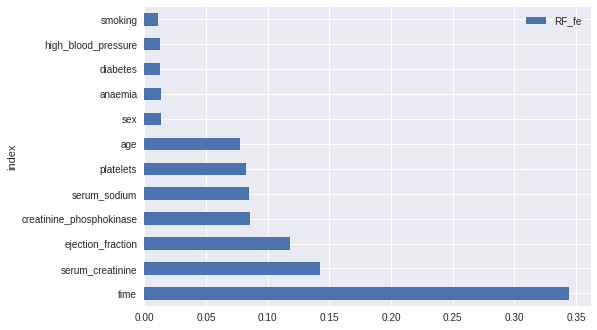

In [26]:
df_feat_imp = pd.DataFrame(list(zip(X_train.columns,rf.feature_importances_)),columns = ['index','RF_fe'])
df_feat_imp.sort_values(by='RF_fe', ascending=False, ignore_index=True, inplace=True)
df_feat_imp.plot.barh(x='index',y='RF_fe')

<a id="5.2"></a>
## b) Feature Scaling

##### When to Scale ?
Rule of thumb I follow here is any algorithm that computes distance or assumes normality, scale your features!!!

Some examples of algorithms where feature scaling matters are:

- k-nearest neighbors with an Euclidean distance measure is sensitive to magnitudes and hence should be scaled for all features to weigh in equally.
- Scaling is critical, while performing Principal Component Analysis(PCA). PCA tries to get the features with maximum variance and the variance is high for high magnitude features. This skews the PCA towards high magnitude features.
- We can speed up gradient descent by scaling. This is because θ will descend quickly on small ranges and slowly on large ranges, and so will oscillate inefficiently down to the optimum when the variables are very uneven.
- Tree based models are not distance based models and can handle varying ranges of features. Hence, Scaling is not required while modelling trees.
- Algorithms like Linear Discriminant Analysis(LDA), Naive Bayes are by design equipped to handle this and gives weights to the features accordingly. Performing a features scaling in these algorithms may not have much effect.

In [27]:
# Performing Standard Scaler on X train and test
from sklearn.preprocessing import StandardScaler

def standard_scaler():
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X.columns)
    return X_train_scaled,X_test_scaled

## 6. Model Creation/Evaluation

1. Logestic Regression
2. K Nearest Neighbour (KNN)
3. Naive Bayers
4. Support Vector machine (SVM)
5. Decision Tree
6. Ensembled Techniques
    - Random Forest
    - Gradient Boosting (GBM)
    - XGboost
    - CatBoost
    - LightGBM

In [28]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, plot_roc_curve

Acc_list = []

def hf_model(model,model_name,features=""):
    # Feature Scaling
    if model_name in ['GaussianNB','XGboost','RandomForest','GradientBoosting',
                      'LGBMClassifier','CatBoostClassifier','DecisionTree']:
        X_train_temp,X_test_temp = X_train,X_test
    else:
        X_train_temp,X_test_temp = standard_scaler()
    
    # Feature Selection
    if model_name not in ['KNN','GaussianNB','SVM']:
        X_train_temp = X_train_temp[features]
        X_test_temp = X_test_temp[features]
   
    # Fitting train set
    model.fit(X_train_temp,y_train)
    
    # Performing prediction on test set
    y_test_pred = model.predict(X_test_temp)
        
    # Calculating Evaluation Metrics
    s1 = accuracy_score(y_test,y_test_pred)
    print(f"{model_name} Success Rate :{round(s1*100,2)}%\n")
    print(classification_report(y_test,y_test_pred))

    
    # Plotting Confusion Matrix and ROC curve
    fig, ax = plt.subplots(1,2,figsize=(12,5))
    plot_confusion_matrix(model,X_test_temp,y_test,cmap='Blues',ax=ax[0])
    ax[0].set_title("Confusion Matrix",fontsize=16)
    ax[0].set_xticks([0,1], ["Heart Not Failed","Heart Fail"])
    ax[0].set_yticks([0,1], ["Heart Not Failed","Heart Fail"])
    ax[0].grid(False)
    
    plot_roc_curve(model,X_test_temp,y_test,ax=ax[1])
    ax[1].set_title("ROC Curve",fontsize=16)
    plt.show()

### a) Logestic Regression

Logestic Regression Success Rate :90.0%

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        46
           1       0.79      0.79      0.79        14

    accuracy                           0.90        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.90      0.90      0.90        60



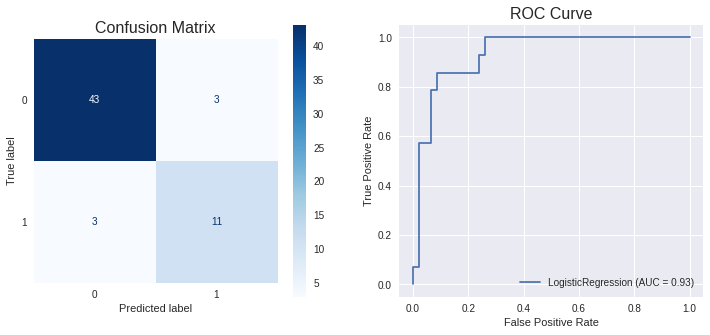

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(n_jobs=-1)
features = top_feat(lr,10)
hf_model(lr,"Logestic Regression",features)

### b) K Nearest Neighbour (KNN)

KNN Success Rate :80.0%

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        46
           1       0.60      0.43      0.50        14

    accuracy                           0.80        60
   macro avg       0.72      0.67      0.69        60
weighted avg       0.78      0.80      0.79        60



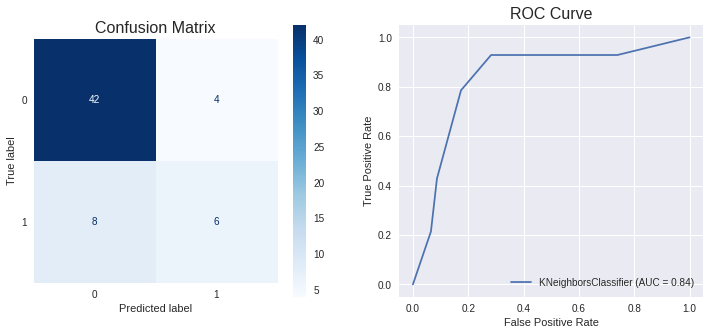

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
hf_model(knn,"KNN")

### c) Gaussian Naive Bayes

GaussianNB Success Rate :93.33%

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.92      0.79      0.85        14

    accuracy                           0.93        60
   macro avg       0.93      0.88      0.90        60
weighted avg       0.93      0.93      0.93        60



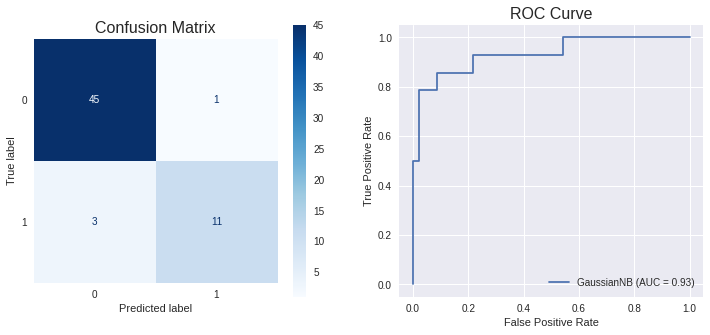

In [31]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
hf_model(gnb,"GaussianNB")

### d) Support Vector machine (SVM)

SVM Success Rate :90.0%

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        46
           1       0.83      0.71      0.77        14

    accuracy                           0.90        60
   macro avg       0.88      0.84      0.85        60
weighted avg       0.90      0.90      0.90        60



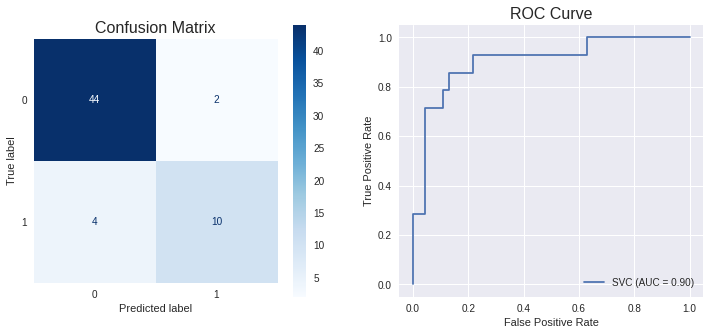

In [32]:
from sklearn.svm import SVC

sv = SVC()
hf_model(sv,"SVM")

### e) Decision Tree Classifier

DecisionTree Success Rate :85.0%

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        46
           1       0.67      0.71      0.69        14

    accuracy                           0.85        60
   macro avg       0.79      0.80      0.80        60
weighted avg       0.85      0.85      0.85        60



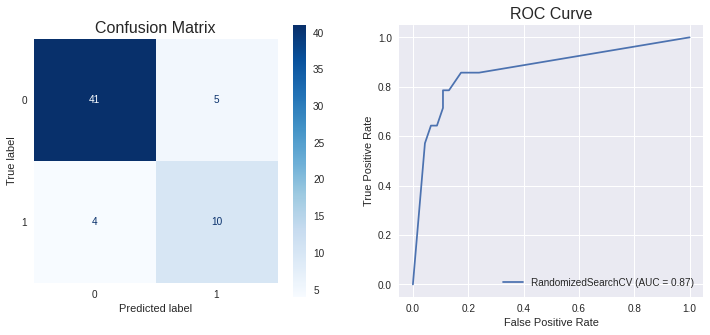

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

dt = DecisionTreeClassifier()

# criteria for splitting nodes
criterion = ["gini", "entropy"]
# Maximum number of levels in a tree
max_depth = list(range(4,17,4))
# The minimum number of samples required to be at a leaf node
min_samples_leaf=[1,2,5,7]
# Minimum number of samples required to split an internal node
min_samples_split=list(range(2,9,2))

# Hyperparameters dict
param_grid = {"max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "criterion":criterion}

# Performing RFE
features = top_feat(dt,10)

# Using Stratified K-fold to train the model
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 0)

dt_rs = RandomizedSearchCV(estimator = dt, param_distributions = param_grid,
                           cv = skf.split(X_train[features],y_train))

hf_model(dt_rs,"DecisionTree",features)

### g) Random Forest Classifier

RandomForest Success Rate :91.67%

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        46
           1       0.85      0.79      0.81        14

    accuracy                           0.92        60
   macro avg       0.89      0.87      0.88        60
weighted avg       0.92      0.92      0.92        60



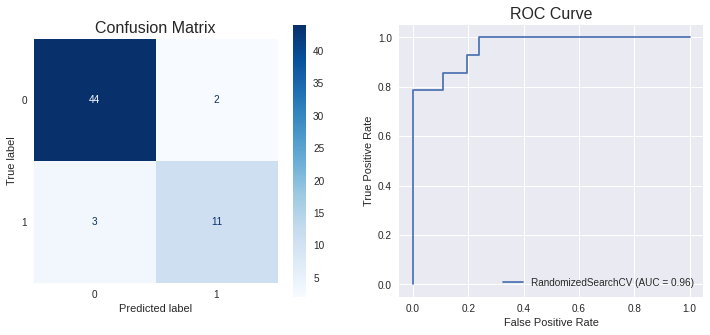

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1)

# Number of trees in Random forest
n_estimators=list(range(400,1000,100))
# Maximum number of levels in a tree
max_depth = list(range(4,13,4))
# The minimum number of samples required to be at a leaf node
min_samples_leaf=[1,2,5,7]
# Minimum number of samples required to split an internal node
min_samples_split=list(range(2,9,2))
# Number of fearures to be considered at each split
max_features=['auto','sqrt']


# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}
# Performing RFE
features = top_feat(rf,10)

# Using Stratified K-fold to train the model
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 0)

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid,
                           cv = skf.split(X_train[features],y_train))

hf_model(rf_rs,"RandomForest",features)

### h) Gradient Boosting Classifier

GradientBoosting Success Rate :93.33%

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.92      0.79      0.85        14

    accuracy                           0.93        60
   macro avg       0.93      0.88      0.90        60
weighted avg       0.93      0.93      0.93        60



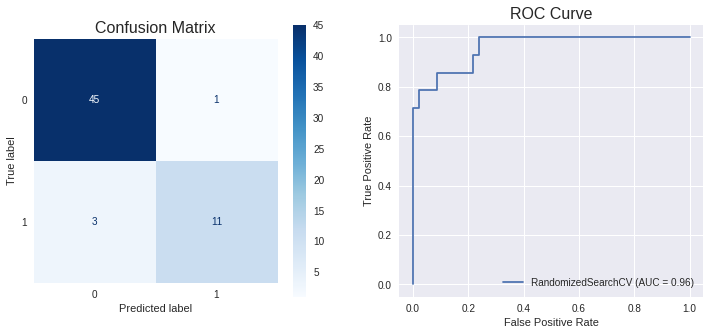

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

# Rate at which correcting is being made
learning_rate = [0.01, 0.1, 0.2,0.3]
# Number of trees in Gradient boosting
n_estimators=list(range(400,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,13,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(2,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

# Performing RFE
features = top_feat(gb,10)

# Using Stratified K-fold to train the model
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 0)

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid,
                           cv = skf.split(X_train[features],y_train))

hf_model(gb_rs,"GradientBoosting",features)

In [36]:
gb_rs.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 12,
 'learning_rate': 0.01}

### i) XGBoost Classifier

XGboost Success Rate :93.33%

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.92      0.79      0.85        14

    accuracy                           0.93        60
   macro avg       0.93      0.88      0.90        60
weighted avg       0.93      0.93      0.93        60



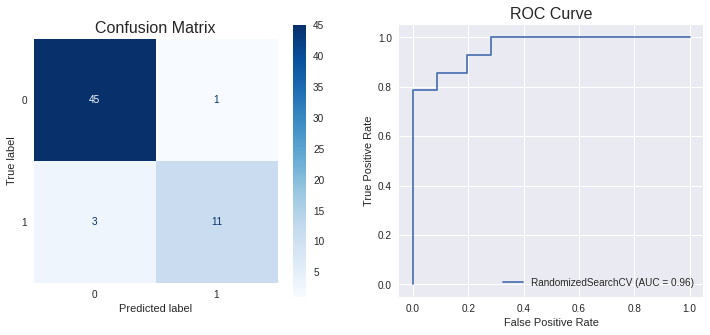

In [37]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_jobs=-1,learning_rate=0.01, n_estimators=1000, objective='binary:logistic')

# Hyperparameters dict
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

# Performing RFE
features = top_feat(xgb,10)

# Using Stratified K-fold to train the model
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 0)

xgb_rs = RandomizedSearchCV(estimator = xgb, param_distributions = param_grid,
                           cv = skf.split(X_train[features],y_train))

hf_model(xgb_rs,"XGboost",features)

### j) LGBM Classifier

LGBMClassifier Success Rate :90.0%

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        46
           1       0.75      0.86      0.80        14

    accuracy                           0.90        60
   macro avg       0.85      0.89      0.87        60
weighted avg       0.91      0.90      0.90        60



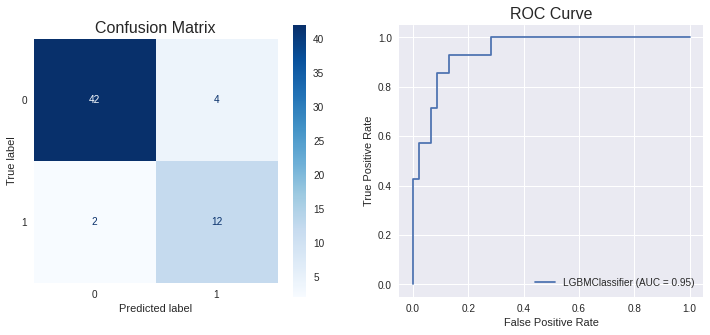

In [38]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(n_jobs=-1,learning_rate=0.01, n_estimators=1000)
features = top_feat(lgb,10)
hf_model(lgb,"LGBMClassifier",features)

### k) CatBoost Classifier

CatBoostClassifier Success Rate :93.33%

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.92      0.79      0.85        14

    accuracy                           0.93        60
   macro avg       0.93      0.88      0.90        60
weighted avg       0.93      0.93      0.93        60



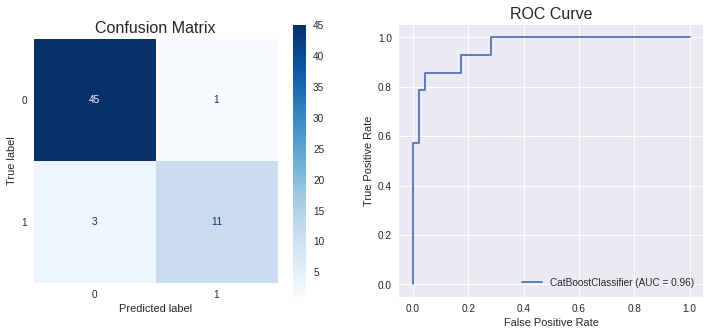

In [39]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(learning_rate=0.01, n_estimators=1000,verbose=0)
features = top_feat(cat,10)
hf_model(cat,"CatBoostClassifier",features)

<b>REFERENCES:</b>
1. Refrence Notebooks:
    - https://www.kaggle.com/rude009/heart-failure-model-prediction-comparisons-95/notebook
    - https://www.kaggle.com/nayansakhiya/heart-fail-analysis-and-quick-prediction
    - https://www.kaggle.com/ksvmuralidhar/heart-failure-prediction-auc-0-98
2. Feature Selection: 
    - https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2
    - https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/